In [2]:
%matplotlib inline
import numpy as np
import skimage.external.tifffile
import os
import matplotlib.pyplot as plt
from PIL import Image

import multiprocessing  
from multiprocessing import Pool

import pylattice as pyl
import pylattice.functions.TiffProcessing as tifproc

import sys
sys.path.append('/Users/johannesschoeneberg/git/JohSchoeneberg/pyLattice/src/python/pylattice/functions')
import ParallelFunctions
from pprint import pprint
import time

In [65]:
#truthFile = "/Users/johannesschoeneberg/git/JohSchoeneberg/pyLatticeML/src/evaluationMetrics/_ignored/realData/dmask_01_cropped_96x480x672.tif"
#truthFile ="/Users/johannesschoeneberg/Dropbox/pyLatticeML/dataset_C_firstFrames/sample5_pos2_o1/dmask_001_croppedToFitPrediction.tif"

#predictionFile = "/Users/johannesschoeneberg/git/JohSchoeneberg/pyLatticeML/src/evaluationMetrics/_ignored/realData/3prediction.tif"
#predictionFile = "/Users/johannesschoeneberg/Dropbox/pyLatticeML/dataset_C_firstFrames/sample5_pos2_o1/sample5_prediction.tif"

##------------paper Fig2 sketch-----------

#PSNR=5_5000particles 
# #mask vs prediction
# truthFile ="/Users/johannesschoeneberg/Dropbox/pyLatticeML/dataset_simulated_data/psnr5_5000_particles/test__X_nonIsotropic_production_5000_1_PSNR5_psnr=20.06726524985623_mask_00_croppedForPrediction.tif"
# predictionFile = "/Users/johannesschoeneberg/Dropbox/pyLatticeML/dataset_simulated_data/psnr5_5000_particles/psnr5_5000prediction_more-epochs.tif"
# 
#mask vs matlab LoG
#truthFile ="/Users/johannesschoeneberg/Dropbox/pyLatticeML/dataset_simulated_data/psnr5_5000_particles/test__X_nonIsotropic_production_5000_1_PSNR5_psnr=20.06726524985623_mask_00.tiff"
#predictionFile = "/Users/johannesschoeneberg/Dropbox/pyLatticeML/dataset_simulated_data/psnr5_5000_particles/matlab_comparison/output/output_master/dmask_1.tif"

 
# #PSNR=100_5000particles 
# #mask vs prediction
#truthFile ="/Users/johannesschoeneberg/Dropbox/pyLatticeML/dataset_simulated_data/psnr100_5000_particles/test__X_nonIsotropic_production_5000_1_psnr=730.959357415139_mask_00_croppedForPredictionCompare.tif"
#predictionFile = "/Users/johannesschoeneberg/Dropbox/pyLatticeML/dataset_simulated_data/psnr100_5000_particles/psnr100_5000_prediction.tif"
# 
# #mask vs matlab LoG
truthFile ="/Users/johannesschoeneberg/Dropbox/pyLatticeML/dataset_simulated_data/psnr100_5000_particles/test__X_nonIsotropic_production_5000_1_psnr=730.959357415139_mask_00.tiff"
predictionFile = "/Users/johannesschoeneberg/Dropbox/pyLatticeML/dataset_simulated_data/psnr100_5000_particles/matlab_comparison/output/output_master/dmask_1.tif"



In [66]:
truth = ParallelFunctions.open3dTiff(truthFile)
prediction = ParallelFunctions.open3dTiff(predictionFile)

GroundTruth


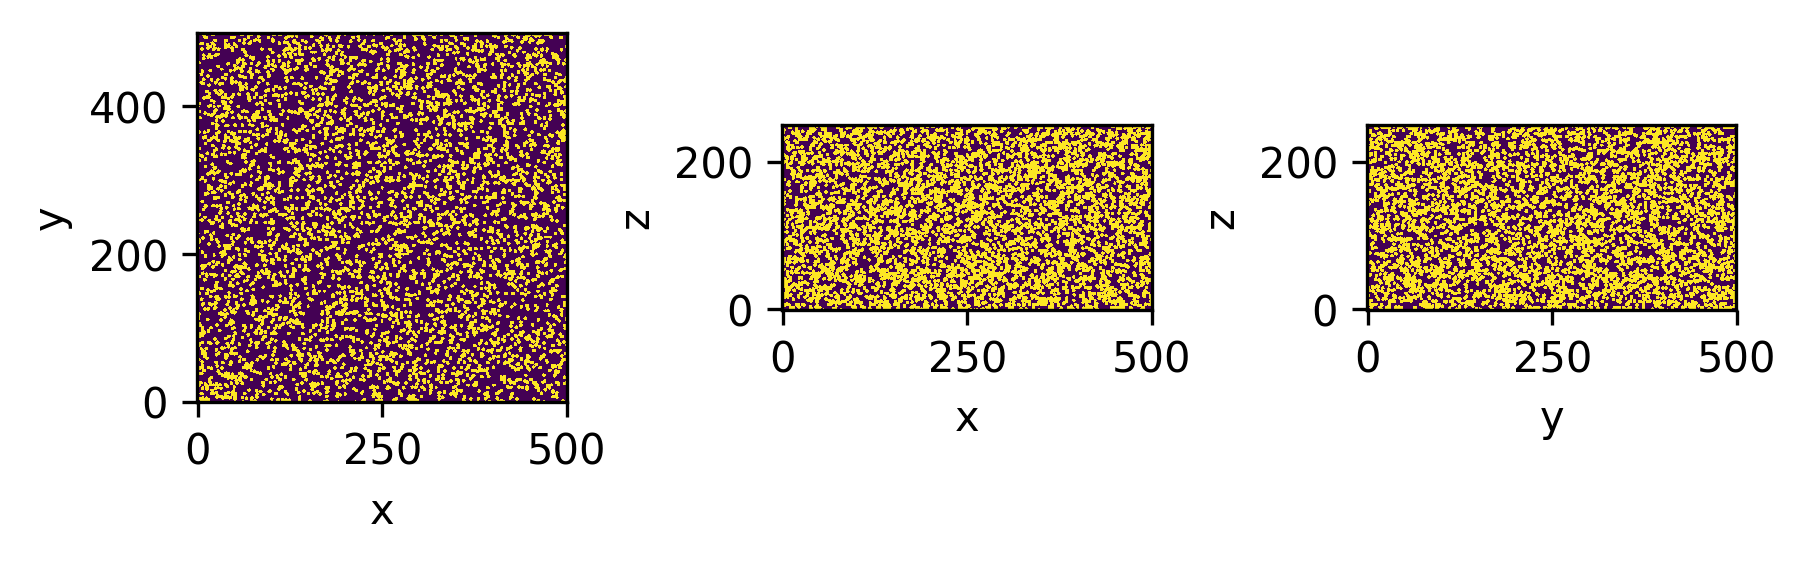

Prediction


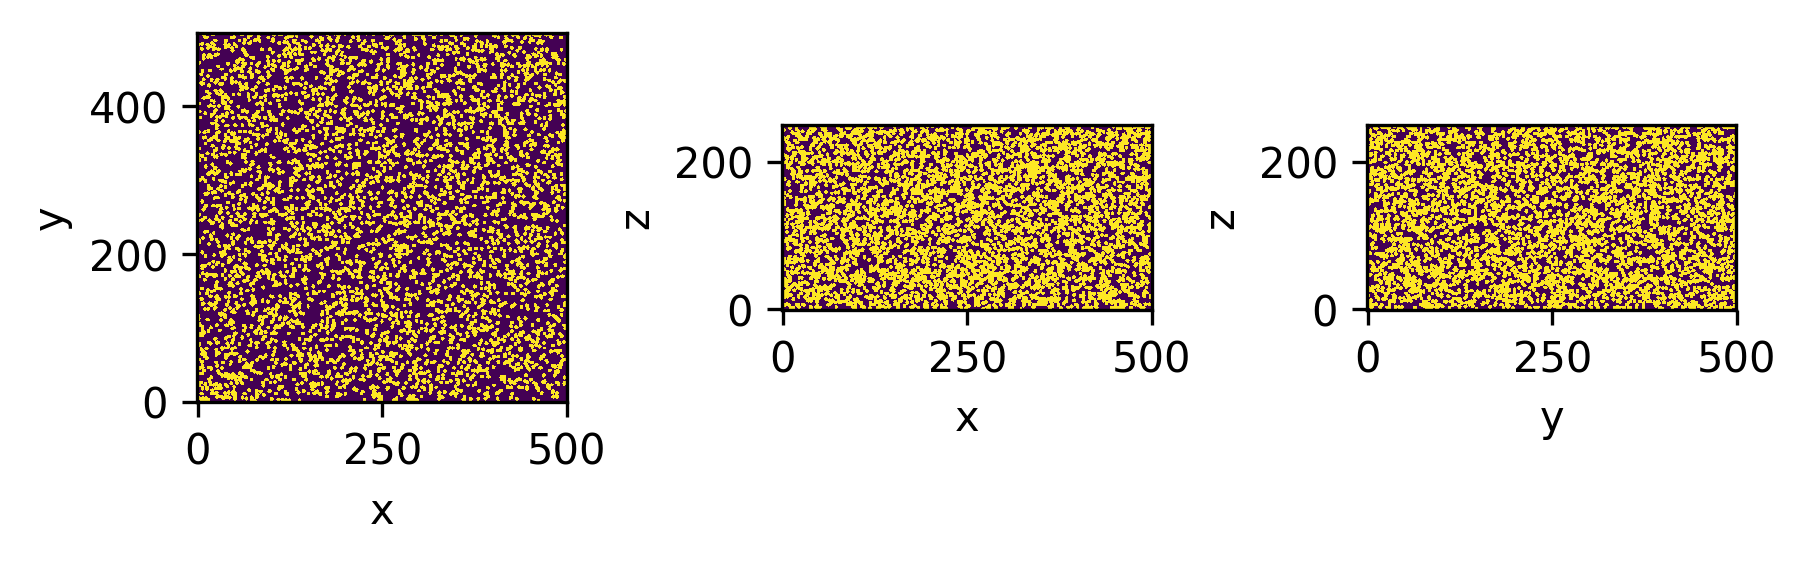

In [67]:
print('GroundTruth')
tifproc.maxIntensityProjection(truth)
print('Prediction')
tifproc.maxIntensityProjection(prediction)

# label all connected components in the mask

In [68]:
from scipy import ndimage
label_im, nb_labels = ndimage.label(truth)
print(nb_labels)

4733


In [69]:
import skimage
import os

multiplierForOutput = 1
outputPath_tiff = "./truth_components_labeled.tiff"
skimage.external.tifffile.imsave(outputPath_tiff, (label_im*multiplierForOutput).astype('uint16'))    
print(os.path.abspath(outputPath_tiff))


/Users/johannesschoeneberg/git/JohSchoeneberg/pyLattice_deepLearning/src/evaluationMetrics/truth_components_labeled.tiff


In [70]:
ndimage.find_objects(label_im==4)[0]

(slice(0, 5, None), slice(79, 84, None), slice(220, 225, None))

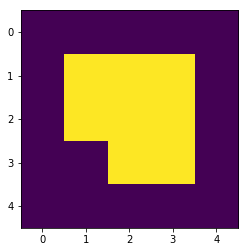

In [71]:
slice_z, slice_x, slice_y  = ndimage.find_objects(label_im==7)[0]
roi = truth[slice_z, slice_x, slice_y]
plt.imshow(roi[0])     

In [72]:
ndimage.measurements.center_of_mass(truth)

(123.34884691517016, 250.86186830745748, 250.69039910805847)

In [73]:
label_im, nb_labels = ndimage.label(truth)
truth_allCentersOfMass = ndimage.measurements.center_of_mass(truth, label_im,range(1,nb_labels+1) )
pprint(truth_allCentersOfMass)

[(0.6470588235294118, 19.5, 346.5882352941176),
 (1.1481481481481481, 41.5, 231.59259259259258),
 (0.4375, 61.25, 137.5),
 (1.492063492063492, 81.33333333333333, 222.17460317460316),
 (2.7222222222222223, 84.09876543209876, 450.6666666666667),
 (1.6307692307692307, 85.0, 407.0),
 (1.9090909090909092, 93.74242424242425, 377.25757575757575),
 (0.7272727272727273, 111.31818181818181, 79.31818181818181),
 (1.828125, 111.40625, 117.8125),
 (0.9433962264150944, 120.39622641509433, 187.77358490566039),
 (1.4098360655737705, 124.40983606557377, 271.1803278688525),
 (1.4516129032258065, 147.5, 215.70967741935485),
 (0.8518518518518519, 152.03703703703704, 229.96296296296296),
 (1.0, 168.22641509433961, 306.54716981132077),
 (1.1551724137931034, 185.3448275862069, 365.2068965517241),
 (2.1911764705882355, 197.08823529411765, 10.735294117647058),
 (0.7142857142857143, 210.0, 184.66666666666666),
 (0.8181818181818182, 213.6590909090909, 255.04545454545453),
 (2.3734177215189876, 220.13924050632912

 (29.96153846153846, 497.9230769230769, 121.57692307692308),
 (30.97222222222222, 6.930555555555555, 50.81944444444444),
 (30.914285714285715, 14.042857142857143, 480.75714285714287),
 (31.375, 14.71875, 299.5),
 (31.16923076923077, 82.75384615384615, 170.2923076923077),
 (32.22872340425532, 90.43085106382979, 4.101063829787234),
 (31.046153846153846, 167.0, 383.3538461538462),
 (30.794117647058822, 176.73529411764707, 51.044117647058826),
 (31.29850746268657, 176.46268656716418, 426.7014925373134),
 (30.5, 181.75757575757575, 65.57575757575758),
 (30.666666666666668, 222.71212121212122, 460.54545454545456),
 (30.753846153846155, 339.75384615384615, 351.46153846153845),
 (30.774193548387096, 352.3225806451613, 46.5),
 (30.95774647887324, 360.90140845070425, 174.83098591549296),
 (30.533333333333335, 393.4, 63.1),
 (30.926470588235293, 470.75, 187.91176470588235),
 (30.723076923076924, 475.6307692307692, 472.53846153846155),
 (31.109375, 486.65625, 391.671875),
 (32.34920634920635, 13.1

 (106.265625, 219.109375, 320.3125),
 (105.95774647887323, 227.80281690140845, 335.9577464788732),
 (106.21875, 251.4375, 454.765625),
 (105.5, 274.9375, 412.9375),
 (106.70718232044199, 287.71270718232046, 86.08839779005525),
 (105.5, 298.71875, 255.625),
 (106.06153846153846, 306.53846153846155, 295.9384615384615),
 (106.3015873015873, 310.3174603174603, 394.9047619047619),
 (105.8840579710145, 340.8840579710145, 179.20289855072463),
 (105.5, 355.28125, 363.625),
 (106.33846153846154, 369.2153846153846, 194.7846153846154),
 (106.33333333333333, 400.5, 17.5),
 (107.24242424242425, 57.696969696969695, 169.04545454545453),
 (106.93846153846154, 85.93846153846154, 211.46153846153845),
 (107.0, 141.231884057971, 43.0),
 (106.9375, 162.296875, 144.296875),
 (106.734375, 177.78125, 337.171875),
 (106.97058823529412, 220.8235294117647, 464.20588235294116),
 (106.49230769230769, 261.33846153846156, 279.7076923076923),
 (107.35384615384615, 308.18461538461537, 134.0),
 (107.0, 308.448275862068

 (183.13235294117646, 366.0, 335.3382352941176),
 (182.63076923076923, 368.0, 363.0),
 (183.06153846153848, 402.0615384615385, 434.53846153846155),
 (182.92307692307693, 423.6307692307692, 490.9230769230769),
 (183.71428571428572, 9.142857142857142, 193.31746031746033),
 (183.63076923076923, 20.0, 435.0),
 (184.36363636363637, 19.666666666666668, 445.2121212121212),
 (183.47540983606558, 59.09836065573771, 154.36065573770492),
 (184.109375, 85.734375, 459.6875),
 (184.16438356164383, 120.0, 275.9178082191781),
 (183.70149253731344, 185.08955223880596, 339.089552238806),
 (183.671875, 186.34375, 472.109375),
 (184.46153846153845, 242.06153846153848, 238.06153846153848),
 (184.32258064516128, 293.5, 193.2258064516129),
 (183.87692307692308, 316.73846153846154, 214.72307692307692),
 (183.77941176470588, 352.77941176470586, 398.05882352941177),
 (183.66666666666666, 355.7121212121212, 52.45454545454545),
 (184.87142857142857, 52.128571428571426, 74.17142857142858),
 (184.94871794871796, 79

In [74]:
label_im, nb_labels = ndimage.label(prediction)
prediction_allCentersOfMass = ndimage.measurements.center_of_mass(prediction, label_im,range(1,nb_labels+1) )
pprint(prediction_allCentersOfMass)

[(3.3088235294117645, 5.294117647058823, 288.95588235294116),
 (3.727272727272727, 17.142857142857142, 109.79220779220779),
 (5.094488188976378, 28.724409448818896, 413.4409448818898),
 (3.4473684210526314, 29.63157894736842, 450.9342105263158),
 (4.012820512820513, 38.42307692307692, 307.28205128205127),
 (4.089743589743589, 43.03846153846154, 72.84615384615384),
 (3.6266666666666665, 46.49333333333333, 277.02666666666664),
 (3.414285714285714, 64.14285714285714, 50.628571428571426),
 (4.564102564102564, 78.7948717948718, 390.3974358974359),
 (2.5806451612903225, 81.48387096774194, 222.19354838709677),
 (3.209090909090909, 84.35454545454546, 450.4818181818182),
 (3.3333333333333335, 83.33333333333333, 48.378787878787875),
 (2.5, 85.025, 407.0),
 (2.760869565217391, 93.84782608695652, 377.1521739130435),
 (4.243589743589744, 93.5, 176.52564102564102),
 (2.8, 111.35555555555555, 117.88888888888889),
 (2.5161290322580645, 124.48387096774194, 271.1290322580645),
 (4.324324324324325, 132.6

 (31.213333333333335, 176.4, 426.7866666666667),
 (30.736842105263158, 222.69736842105263, 460.6578947368421),
 (31.613333333333333, 247.22666666666666, 325.5466666666667),
 (31.0, 322.5483870967742, 214.20967741935485),
 (30.805194805194805, 339.76623376623377, 351.4805194805195),
 (30.973333333333333, 360.9066666666667, 174.82666666666665),
 (30.883116883116884, 470.7922077922078, 187.94805194805195),
 (30.714285714285715, 475.5974025974026, 472.4935064935065),
 (31.02409638554217, 486.6144578313253, 391.73493975903614),
 (32.3974358974359, 13.256410256410257, 223.6153846153846),
 (32.7875, 40.75, 178.1625),
 (32.310810810810814, 82.4054054054054, 341.27027027027026),
 (32.0, 85.3125, 193.8),
 (32.1978021978022, 90.47252747252747, 4.1098901098901095),
 (32.52564102564103, 112.64102564102564, 434.52564102564105),
 (32.1025641025641, 134.52564102564102, 227.71794871794873),
 (31.987179487179485, 179.7051282051282, 130.87179487179486),
 (32.0253164556962, 189.16455696202533, 425.1772151

 (92.75324675324676, 386.4415584415584, 18.714285714285715),
 (93.32051282051282, 397.7564102564103, 319.1666666666667),
 (92.92682926829268, 438.3292682926829, 86.4390243902439),
 (92.71052631578948, 461.36842105263156, 325.2631578947368),
 (93.1948051948052, 462.15584415584414, 359.6233766233766),
 (93.62962962962963, 462.8641975308642, 248.39506172839506),
 (93.01282051282051, 477.11538461538464, 351.2435897435897),
 (94.74698795180723, 29.096385542168676, 224.83132530120483),
 (94.11842105263158, 38.03947368421053, 5.7105263157894735),
 (93.82894736842105, 45.14473684210526, 95.86842105263158),
 (94.63291139240506, 56.45569620253165, 101.0886075949367),
 (93.77631578947368, 86.59210526315789, 60.526315789473685),
 (94.51851851851852, 107.96296296296296, 100.60493827160494),
 (94.16, 140.53333333333333, 198.86666666666667),
 (94.06410256410257, 160.93589743589743, 221.10256410256412),
 (94.10126582278481, 237.78481012658227, 52.164556962025316),
 (94.0875, 242.0625, 97.8375),
 (93.9

 (172.8148148148148, 170.2716049382716, 113.5925925925926),
 (173.37662337662337, 219.35064935064935, 196.2077922077922),
 (173.83962264150944, 254.4245283018868, 185.32075471698113),
 (172.8227848101266, 287.26582278481015, 166.81012658227849),
 (173.54320987654322, 298.5432098765432, 272.6296296296296),
 (172.8, 317.625, 140.2125),
 (173.5205479452055, 337.6027397260274, 479.8767123287671),
 (172.80263157894737, 344.7631578947368, 363.38157894736844),
 (173.17142857142858, 384.48571428571427, 59.371428571428574),
 (173.07692307692307, 423.61538461538464, 257.7692307692308),
 (172.71153846153845, 495.03846153846155, 456.3942307692308),
 (174.0, 32.8051948051948, 410.87012987012986),
 (173.97402597402598, 33.84415584415584, 384.87012987012986),
 (174.67948717948718, 62.06410256410256, 236.17948717948718),
 (174.6, 79.1125, 489.4375),
 (174.14084507042253, 137.01408450704224, 229.69014084507043),
 (174.0493827160494, 139.14814814814815, 151.3827160493827),
 (174.7093023255814, 139.15116

In [75]:
# find the closest match between points
# if that distance is below threshold: match -> remove both locations, put predicted location into TP
# if that distance is above threshold: no-match found -> put the predicted location into FP
# end 1: put remaining locations in truth into FN (false negative, i.e. there is something but we predicted nothing)
# end 2: put the remaining locations in prediction into FP 

In [76]:
start_time = time.time()

prediction_truth_matches = []
distanceThreshold = 3

i = 0
truth_allCentersOfMass_available_for_match = truth_allCentersOfMass
for predictionCOM in prediction_allCentersOfMass:
    # got throuth the array and find the closest center of mass (COM) to that prediction
    closestDistance = 10000
    closestTruthCOM = []
    for truthCOM in truth_allCentersOfMass_available_for_match:
        if(False):
            print("pred {}".format(predictionCOM))
            print(truthCOM)
            print("dist {}".format(dist))
        dist = np.linalg.norm(np.array(predictionCOM)-np.array(truthCOM))
        if(dist < closestDistance):
            closestDistance = dist
            closestTruthCOM = truthCOM
    # in the end, check if that closest found COM is a shorter distance away than your threshold
    if(closestDistance < distanceThreshold):
        if(False):
            print([predictionCOM,closestTruthCOM,closestDistance])
        prediction_truth_matches.append([predictionCOM,closestTruthCOM,closestDistance])
        # remove the location to prevent double counting
        itemindex = np.where(truth_allCentersOfMass_available_for_match==closestTruthCOM)
        np.delete(truth_allCentersOfMass_available_for_match, itemindex)
    #else:
        #prediction_truth_matches.append([predictionCOM,None,None])
    i = i+1
    if(i%100 == 0):
        print(i)

elapsed_time = time.time() - start_time
print("elapsed time: {}".format(elapsed_time))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
elapsed time: 115.87666082382202


In [77]:
pprint(prediction_truth_matches)
print(len(prediction_truth_matches))

[[(3.3088235294117645, 5.294117647058823, 288.95588235294116),
  (3.0317460317460316, 5.412698412698413, 288.968253968254),
  0.3016395109361898],
 [(3.727272727272727, 17.142857142857142, 109.79220779220779),
  (3.59375, 17.171875, 109.8125),
  0.13813807740298314],
 [(5.094488188976378, 28.724409448818896, 413.4409448818898),
  (4.903614457831325, 28.53614457831325, 413.578313253012),
  0.3012416174643225],
 [(3.4473684210526314, 29.63157894736842, 450.9342105263158),
  (3.253968253968254, 29.634920634920636, 451.0),
  0.20431115082542203],
 [(4.012820512820513, 38.42307692307692, 307.28205128205127),
  (3.890625, 38.34375, 307.328125),
  0.15279820536884176],
 [(4.089743589743589, 43.03846153846154, 72.84615384615384),
  (4.073529411764706, 43.088235294117645, 72.75),
  0.10948008243429855],
 [(3.6266666666666665, 46.49333333333333, 277.02666666666664),
  (3.5344827586206895, 46.53448275862069, 276.9310344827586),
  0.13905632924512892],
 [(3.414285714285714, 64.14285714285714, 50.6

 [(6.063291139240507, 74.40506329113924, 462.44303797468353),
  (5.903225806451613, 74.35483870967742, 462.43548387096774),
  0.16792999680457066],
 [(5.894736842105263, 81.27631578947368, 285.9078947368421),
  (5.984848484848484, 81.33333333333333, 285.92424242424244),
  0.10788120943430375],
 [(5.948717948717949, 97.7051282051282, 239.9102564102564),
  (6.0, 97.609375, 239.96875),
  0.12336946590267166],
 [(6.0, 115.02439024390245, 286.0243902439024),
  (5.847222222222222, 115.06944444444444, 286.0833333333333),
  0.16983880051641126],
 [(9.007299270072993, 139.1094890510949, 353.54744525547443),
  (8.955128205128204, 139.12179487179486, 353.5),
  0.07158425460676986],
 [(6.455696202531645, 141.27848101265823, 260.8101265822785),
  (6.5, 141.375, 260.71875),
  0.14010146743162252],
 [(5.853658536585366, 172.2560975609756, 208.8170731707317),
  (5.7846153846153845, 172.33846153846153, 208.7846153846154),
  0.11226882693260944],
 [(5.851351351351352, 190.48648648648648, 265.82432432432

 [(19.71604938271605, 238.88888888888889, 47.34567901234568),
  (19.625, 238.828125, 47.34375),
  0.1094804154837956],
 [(19.20253164556962, 259.0379746835443, 407.27848101265823),
  (19.242424242424242, 259.04545454545456, 407.3030303030303),
  0.047434536740381956],
 [(20.659259259259258, 273.57037037037037, 324.1925925925926),
  (20.68235294117647, 273.51176470588234, 324.2470588235294),
  0.0832737195460954],
 [(18.92, 276.82666666666665, 152.57333333333332),
  (18.83606557377049, 276.8360655737705, 152.54098360655738),
  0.09044242468942577],
 [(18.9875, 283.025, 415.0125),
  (18.93243243243243, 283.13513513513516, 415.06756756756755),
  0.13488744191681212],
 [(19.51851851851852, 331.41975308641975, 245.87654320987653),
  (19.58730158730159, 331.3333333333333, 245.82539682539684),
  0.12171867942136473],
 [(19.050632911392405, 332.0, 319.9746835443038),
  (19.08, 331.96, 319.88),
  0.10689901522098251],
 [(19.185185185185187, 367.5679012345679, 191.4320987654321),
  (19.25, 367.5

 [(24.794871794871796, 133.48717948717947, 251.32051282051282),
  (24.727272727272727, 133.45454545454547, 251.27272727272728),
  0.0889835524318107],
 [(25.413333333333334, 158.17333333333335, 467.0),
  (25.5, 158.13333333333333, 467.03333333333336),
  0.10110500592070361],
 [(25.4390243902439, 256.9024390243902, 31.597560975609756),
  (25.41269841269841, 256.8253968253968, 31.666666666666668),
  0.10679023389767085],
 [(26.14788732394366, 271.5422535211268, 210.1549295774648),
  (26.181818181818183, 271.4805194805195, 210.14935064935065),
  0.07066483796561485],
 [(25.225, 284.05, 215.5), (25.1875, 284.125, 215.5), 0.08385254915623258],
 [(25.02469135802469, 318.8024691358025, 163.06172839506172),
  (25.0, 318.80281690140845, 163.05633802816902),
  0.025275287481213604],
 [(25.10958904109589, 326.4657534246575, 489.83561643835617),
  (24.928571428571427, 326.27142857142854, 489.87142857142857),
  0.2679776735135141],
 [(25.2375, 376.25, 270.675),
  (25.196969696969695, 376.2424242424

 [(37.01234567901235, 413.5679012345679, 104.5925925925926),
  (36.96923076923077, 413.6307692307692, 104.66153846153846),
  0.1027852773335792],
 [(37.270270270270274, 443.5, 485.56756756756755),
  (37.31147540983606, 443.5245901639344, 485.5245901639344),
  0.06441736498804422],
 [(38.38461538461539, 17.435897435897434, 256.1794871794872),
  (38.375, 17.5, 256.28125),
  0.1206534955339019],
 [(38.6993006993007, 68.08391608391608, 46.20979020979021),
  (38.63291139240506, 68.06962025316456, 46.18987341772152),
  0.07077138866283772],
 [(38.05128205128205, 104.05128205128206, 3.948717948717949),
  (38.111111111111114, 104.11111111111111, 3.888888888888889),
  0.10362697139300964],
 [(37.98684210526316, 117.65789473684211, 168.06578947368422),
  (38.0, 117.63076923076923, 168.0),
  0.07236835027318338],
 [(38.02298850574713, 162.29885057471265, 333.32183908045977),
  (38.0, 162.265625, 333.328125),
  0.040889154991729154],
 [(38.53164556962025, 183.50632911392404, 6.291139240506329),
  

  (41.661764705882355, 330.0735294117647, 421.05882352941177),
  0.20640689481791227],
 [(42.075949367088604, 349.0506329113924, 57.075949367088604),
  (42.05714285714286, 348.95714285714286, 57.22857142857143),
  0.17996546532930685],
 [(42.048780487804876, 361.4146341463415, 76.34146341463415),
  (42.12903225806452, 361.5, 76.35483870967742),
  0.11792613840090056],
 [(42.4, 365.2625, 191.0),
  (42.38709677419355, 365.258064516129, 191.03225806451613),
  0.035024983650366236],
 [(41.860759493670884, 385.9240506329114, 39.139240506329116),
  (41.794117647058826, 385.95588235294116, 39.26470588235294),
  0.14558830550808977],
 [(41.96470588235294, 403.4, 98.4),
  (41.84126984126984, 403.4761904761905, 98.36507936507937),
  0.14920085671223224],
 [(42.273972602739725, 451.3013698630137, 258.36986301369865),
  (42.25, 451.25, 258.5),
  0.14194782038397152],
 [(42.675324675324674, 450.7012987012987, 456.76623376623377),
  (42.61764705882353, 450.70588235294116, 456.6617647058824),
  0.119

 [(53.63636363636363, 120.40259740259741, 139.23376623376623),
  (53.63076923076923, 120.46153846153847, 139.27692307692308),
  0.07326567350617258],
 [(52.80769230769231, 141.89743589743588, 494.03846153846155),
  (52.77142857142857, 141.92857142857142, 494.0),
  0.06134957055861508],
 [(53.40506329113924, 151.37974683544303, 75.39240506329114),
  (53.375, 151.5, 75.28125),
  0.16649346280063124],
 [(52.97530864197531, 156.2469135802469, 326.6296296296296),
  (52.890625, 156.15625, 326.5625),
  0.14105882168655906],
 [(52.82716049382716, 212.71604938271605, 461.8641975308642),
  (52.79365079365079, 212.5873015873016, 461.7936507936508),
  0.15058465048420974],
 [(53.851851851851855, 240.92592592592592, 18.962962962962962),
  (53.80281690140845, 240.95774647887325, 18.95774647887324),
  0.05868718481166948],
 [(53.11842105263158, 256.0131578947368, 264.19736842105266),
  (53.1764705882353, 255.97058823529412, 264.20588235294116),
  0.07248731975371198],
 [(52.9375, 264.975, 487.0625),


 [(58.18987341772152, 339.32911392405066, 411.1898734177215),
  (58.215384615384615, 339.33846153846156, 411.2153846153846),
  0.037269562750126745],
 [(57.756410256410255, 351.4230769230769, 53.62820512820513),
  (57.71875, 351.5, 53.625),
  0.08570721978348042],
 [(58.53012048192771, 385.13253012048193, 218.32530120481928),
  (58.61290322580645, 385.14516129032256, 218.33870967741936),
  0.08480752486131533],
 [(58.2375, 421.7875, 321.5625),
  (58.09230769230769, 421.87692307692305, 321.5692307692308),
  0.1706534387401454],
 [(58.64473684210526, 464.85526315789474, 214.0),
  (58.5625, 464.84375, 214.109375),
  0.13732567723901712],
 [(58.0125, 486.025, 146.9875),
  (58.111111111111114, 486.1111111111111, 146.88888888888889),
  0.1639006587110876],
 [(59.0, 487.1101694915254, 465.0),
  (59.00558659217877, 487.24022346368713, 464.86033519553075),
  0.1909227678791679],
 [(57.8974358974359, 492.3974358974359, 407.2307692307692),
  (57.8125, 492.40625, 407.296875),
  0.10798966525943075

  0.11600674721727787],
 [(72.79136690647482, 292.8561151079137, 291.8705035971223),
  (72.92682926829268, 292.9024390243902, 291.9329268292683),
  0.15618135810188166],
 [(71.55128205128206, 308.43589743589746, 288.6666666666667),
  (71.62295081967213, 308.40983606557376, 288.57377049180326),
  0.12018862962008846],
 [(71.49397590361446, 312.9759036144578, 61.51807228915663),
  (71.50847457627118, 313.03389830508473, 61.610169491525426),
  0.1097974969381253],
 [(70.88607594936708, 325.4177215189873, 460.4810126582278),
  (70.87096774193549, 325.35483870967744, 460.5),
  0.06740196425974983],
 [(71.54430379746836, 338.7721518987342, 400.253164556962),
  (71.53846153846153, 338.75384615384615, 400.24615384615385),
  0.020454396892713805],
 [(70.9113924050633, 383.0632911392405, 438.873417721519),
  (70.86764705882354, 383.0882352941176, 438.77941176470586),
  0.10664420329545855],
 [(70.90789473684211, 413.19736842105266, 150.05263157894737),
  (70.86764705882354, 413.22058823529414, 1

  0.11001763052783017],
 [(78.13227513227513, 398.968253968254, 39.22751322751323),
  (79.15432098765432, 398.20576131687244, 39.77160493827161),
  1.3863652345700985],
 [(77.0, 406.20512820512823, 394.3974358974359),
  (77.0, 406.25396825396825, 394.36507936507934),
  0.058585796545216694],
 [(77.0, 423.0, 285.0),
  (76.83561643835617, 423.0, 285.0821917808219),
  0.18378640910956653],
 [(77.0609756097561, 424.5487804878049, 462.3292682926829),
  (77.04761904761905, 424.58730158730157, 462.2857142857143),
  0.05965923550949613],
 [(77.0379746835443, 454.9746835443038, 330.9620253164557),
  (77.10958904109589, 454.86301369863014, 330.86301369863014),
  0.16553570945490245],
 [(77.46835443037975, 479.1392405063291, 204.50632911392404),
  (77.40322580645162, 479.16129032258067, 204.53225806451613),
  0.07348634247469057],
 [(78.65822784810126, 32.65822784810127, 210.78481012658227),
  (78.63076923076923, 32.63076923076923, 210.8),
  0.04169752493879064],
 [(77.8076923076923, 140.43589743

  0.038877751887616344],
 [(90.4, 343.72, 159.66666666666666),
  (90.46153846153847, 343.7230769230769, 159.63076923076923),
  0.07130971608519784],
 [(90.59558823529412, 361.7352941176471, 311.74264705882354),
  (90.64112903225806, 359.27016129032256, 310.31854838709677),
  2.8472813080823234],
 [(90.62337662337663, 370.05194805194805, 395.09090909090907),
  (90.53846153846153, 370.0615384615385, 395.0615384615385),
  0.09036139370259128],
 [(90.21794871794872, 390.78205128205127, 47.08974358974359),
  (90.3030303030303, 390.75757575757575, 47.04545454545455),
  0.0989921555598381],
 [(90.31168831168831, 437.27272727272725, 210.2987012987013),
  (90.34848484848484, 437.3484848484849, 210.34848484848484),
  0.09783454008651694],
 [(89.65853658536585, 447.5609756097561, 389.0121951219512),
  (89.63492063492063, 447.74603174603175, 389.0),
  0.1869550953788291],
 [(90.17948717948718, 463.70512820512823, 404.8333333333333),
  (90.15384615384616, 463.6, 404.84615384615387),
  0.10896681723

 [(96.4342105263158, 123.5657894736842, 491.2631578947368),
  (96.4375, 123.65625, 491.203125),
  0.1086180275503653],
 [(95.95061728395062, 132.59259259259258, 8.481481481481481),
  (95.75, 132.5, 8.5),
  0.22172870439088477],
 [(96.24324324324324, 131.36486486486487, 412.47297297297297),
  (96.24242424242425, 131.42424242424244, 412.5),
  0.06524435232185076],
 [(96.20731707317073, 150.109756097561, 67.2439024390244),
  (96.25373134328358, 150.07462686567163, 67.22388059701493),
  0.061556653261014886],
 [(96.14666666666666, 174.44, 92.92),
  (96.06153846153846, 174.41538461538462, 93.0),
  0.1193847916114584],
 [(95.90243902439025, 197.82926829268294, 334.1463414634146),
  (95.84375, 197.71875, 334.28125),
  0.18400817331043007],
 [(96.28, 277.1066666666667, 288.8933333333333),
  (96.41538461538461, 277.0923076923077, 288.95384615384614),
  0.1489864949379564],
 [(96.55128205128206, 459.2564102564103, 95.85897435897436),
  (96.5, 459.2258064516129, 95.80645161290323),
  0.0795303747

  0.1263832889762399],
 [(108.98630136986301, 478.0, 373.3972602739726),
  (108.93846153846154, 478.0, 373.4153846153846),
  0.05115800250341554],
 [(109.49333333333334, 484.8666666666667, 341.0),
  (109.5, 484.6774193548387, 341.0),
  0.18936469966324704],
 [(108.6774193548387, 496.51612903225805, 62.03225806451613),
  (108.859375, 497.578125, 61.90625),
  1.0848139585335934],
 [(110.75, 3.2205882352941178, 225.9264705882353),
  (110.69117647058823, 2.823529411764706, 225.9558823529412),
  0.4024685936295302],
 [(110.49367088607595, 8.746835443037975, 276.5822784810127),
  (110.5, 8.757575757575758, 276.57575757575756),
  0.014068910575461887],
 [(111.74615384615385, 21.2, 458.60769230769233),
  (111.72727272727273, 21.29090909090909, 458.6969696969697),
  0.12880765387313145],
 [(110.3875, 29.45, 112.1875),
  (110.45454545454545, 29.454545454545453, 112.24242424242425),
  0.08678955316228189],
 [(109.97222222222223, 61.361111111111114, 466.15277777777777),
  (110.0, 61.41538461538462

 [(114.36842105263158, 175.60526315789474, 193.3684210526316),
  (114.29850746268657, 175.70149253731344, 193.53731343283582),
  0.20657356949366873],
 [(114.06172839506173, 205.0493827160494, 423.08641975308643),
  (114.02777777777777, 205.06944444444446, 423.18055555555554),
  0.10206207261594771],
 [(113.9493670886076, 359.88607594936707, 428.49367088607596),
  (113.95384615384616, 359.9076923076923, 428.5846153846154),
  0.093585419736443],
 [(114.55555555555556, 386.6666666666667, 495.34722222222223),
  (114.6969696969697, 386.6969696969697, 495.5),
  0.21037414864987272],
 [(114.02439024390245, 391.0, 334.0243902439024),
  (114.10666666666667, 391.0, 334.1066666666667),
  0.11635643293673799],
 [(114.25925925925925, 438.14814814814815, 237.4814814814815),
  (114.33333333333333, 438.1746031746032, 237.4126984126984),
  0.1044889823181755],
 [(113.72, 455.4, 414.49333333333334),
  (113.74242424242425, 455.43939393939394, 414.3939393939394),
  0.10924231916948351],
 [(114.4567901234

  0.10097398340901541],
 [(126.34615384615384, 183.16666666666666, 162.7948717948718),
  (126.34848484848484, 183.15151515151516, 162.77272727272728),
  0.026932913772227562],
 [(125.72368421052632, 187.26315789473685, 224.69736842105263),
  (125.61764705882354, 187.33823529411765, 224.7058823529412),
  0.1302036116059216],
 [(125.93589743589743, 195.7051282051282, 119.12820512820512),
  (125.92424242424242, 195.56060606060606, 119.0909090909091),
  0.14971133541567327],
 [(126.1025641025641, 202.74358974358975, 397.5),
  (126.0952380952381, 202.8095238095238, 397.57142857142856),
  0.09748339474115442],
 [(126.41975308641975, 220.8395061728395, 202.39506172839506),
  (126.5, 220.71875, 202.375),
  0.14636971464136744],
 [(126.54430379746836, 222.0126582278481, 409.5189873417722),
  (126.64516129032258, 222.09677419354838, 409.56451612903226),
  0.13899856121522486],
 [(126.3076923076923, 233.73076923076923, 141.52564102564102),
  (126.25, 233.75, 141.5),
  0.06599762910888993],
 [(126

  (129.3125, 304.109375, 155.734375),
  0.0971436686619852],
 [(129.21678321678323, 312.965034965035, 374.72027972027973),
  (129.21656050955414, 313.0127388535032, 374.71974522292993),
  0.04770740257984312],
 [(129.4125, 333.525, 374.35),
  (129.31147540983608, 333.5245901639344, 374.4754098360656),
  0.1610396310396232],
 [(128.83333333333334, 341.87179487179486, 236.0897435897436),
  (128.76119402985074, 341.8358208955224, 236.08955223880596),
  0.08061167837844324],
 [(129.73076923076923, 341.0897435897436, 316.2307692307692),
  (129.65079365079364, 341.1111111111111, 316.25396825396825),
  0.0859701054972596],
 [(129.1818181818182, 405.35064935064935, 35.37662337662338),
  (129.14285714285714, 405.3492063492063, 35.34920634920635),
  0.04766275487710572],
 [(129.45569620253164, 472.17721518987344, 155.20253164556962),
  (129.453125, 472.234375, 155.28125),
  0.09731615642014553],
 [(129.69565217391303, 13.695652173913043, 176.6086956521739),
  (129.64285714285714, 13.885714285714

 [(141.1851851851852, 235.83333333333334, 458.76851851851853),
  (141.17514124293785, 235.7909604519774, 458.85310734463275),
  0.0951399566620264],
 [(138.81132075471697, 237.8490566037736, 496.1320754716981),
  (138.69117647058823, 237.9558823529412, 496.8235294117647),
  0.7098978383736944],
 [(139.30263157894737, 239.57894736842104, 33.71052631578947),
  (139.24615384615385, 239.53846153846155, 33.753846153846155),
  0.08188678219507074],
 [(139.0625, 304.0125, 240.975),
  (139.0125, 304.025, 240.9875),
  0.053033008589003124],
 [(138.98611111111111, 345.4583333333333, 35.84722222222222),
  (138.74242424242425, 345.43939393939394, 35.60606060606061),
  0.3433670277165254],
 [(139.03896103896105, 351.6753246753247, 417.7142857142857),
  (139.0, 351.671875, 417.734375),
  0.04397092468074847],
 [(139.0909090909091, 358.87012987012986, 88.97402597402598),
  (139.11428571428573, 358.84285714285716, 88.92857142857143),
  0.05793430655374831],
 [(138.825, 391.4625, 66.825),
  (138.920634

  (145.0625, 98.5, 82.9375),
  0.09422933018263259],
 [(144.9240506329114, 105.17721518987342, 115.83544303797468),
  (144.95652173913044, 105.14492753623189, 115.78260869565217),
  0.06991661494535273],
 [(145.1153846153846, 131.24358974358975, 19.012820512820515),
  (145.0909090909091, 131.33333333333334, 19.075757575757574),
  0.11231223036500165],
 [(145.64705882352942, 130.3294117647059, 456.8235294117647),
  (145.63235294117646, 130.39705882352942, 456.7352941176471),
  0.11215103508784907],
 [(145.2405063291139, 149.13924050632912, 171.44303797468353),
  (145.26984126984127, 149.20634920634922, 171.57142857142858),
  0.14781157498117295],
 [(145.5679012345679, 153.71604938271605, 389.8024691358025),
  (145.546875, 153.71875, 389.765625),
  0.042507484245135264],
 [(145.36986301369862, 201.27397260273972, 327.3013698630137),
  (145.21428571428572, 201.28571428571428, 327.2),
  0.18605916354509908],
 [(145.46153846153845, 204.87179487179486, 271.6666666666667),
  (145.564516129032

  (156.5625, 439.109375, 411.15625),
  0.06791050255189496],
 [(156.8684210526316, 42.0, 381.13157894736844),
  (156.85294117647058, 41.94117647058823, 381.25),
  0.1331291849474948],
 [(157.66233766233765, 65.31168831168831, 48.22077922077922),
  (157.6969696969697, 65.3030303030303, 48.21212121212121),
  0.0367328198019056],
 [(157.08641975308643, 127.77777777777777, 254.14814814814815),
  (157.2, 127.6923076923077, 254.15384615384616),
  0.14226058930055627],
 [(157.325, 142.4875, 99.1375),
  (157.33333333333334, 142.4126984126984, 99.17460317460318),
  0.08391285642211466],
 [(157.52702702702703, 152.14864864864865, 215.64864864864865),
  (157.5625, 152.21875, 215.515625),
  0.1544921434009681],
 [(156.9625, 167.0, 183.0625),
  (156.93055555555554, 166.97222222222223, 183.18055555555554),
  0.12541597452742814],
 [(157.79761904761904, 230.1547619047619, 274.7738095238095),
  (157.75384615384615, 230.16923076923078, 274.7076923076923),
  0.0806033531272868],
 [(157.22972972972974, 2

  (163.45454545454547, 31.666666666666668, 331.7121212121212),
  0.08348795148360624],
 [(163.05333333333334, 34.013333333333335, 231.66666666666666),
  (163.07575757575756, 34.09090909090909, 231.56060606060606),
  0.13330302685870923],
 [(163.1375, 38.1125, 345.0875),
  (163.16438356164383, 38.082191780821915, 345.0),
  0.09642387689986816],
 [(163.4875, 51.275, 492.1375),
  (163.5, 51.32258064516129, 492.2258064516129),
  0.10108509875561376],
 [(162.80246913580248, 105.90123456790124, 405.641975308642),
  (162.67741935483872, 105.85483870967742, 405.56451612903226),
  0.1542399036735321],
 [(162.70666666666668, 136.44, 248.62666666666667),
  (162.71212121212122, 136.45454545454547, 248.66666666666666),
  0.04291063171347327],
 [(162.93506493506493, 157.83116883116884, 401.1038961038961),
  (162.94202898550725, 157.7391304347826, 401.05797101449275),
  0.10309548120368445],
 [(163.5, 158.1341463414634, 107.97560975609755),
  (163.59375, 158.125, 108.0625),
  0.12815081953538826],
 [

  (174.73846153846154, 185.07692307692307, 387.7076923076923),
  0.07983664905633969],
 [(174.90123456790124, 208.09876543209876, 339.0987654320988),
  (174.83582089552237, 208.08955223880596, 339.23880597014926),
  0.15483921906999357],
 [(174.82051282051282, 250.66666666666666, 56.06410256410256),
  (174.93846153846152, 250.58461538461538, 56.0),
  0.1573322969911953],
 [(174.93589743589743, 287.78205128205127, 436.70512820512823),
  (174.9375, 287.703125, 436.703125),
  0.0789679621170846],
 [(175.02597402597402, 295.8831168831169, 359.8831168831169),
  (174.97222222222223, 295.93055555555554, 359.81944444444446),
  0.09588463639086153],
 [(175.44871794871796, 300.47435897435895, 411.3333333333333),
  (175.5, 300.375, 411.28125),
  0.12334799625638727],
 [(175.2207792207792, 308.54545454545456, 201.7792207792208),
  (175.1875, 308.59375, 201.828125),
  0.07636478426240169],
 [(175.44285714285715, 340.8, 330.48571428571427),
  (175.65217391304347, 340.7971014492754, 330.3913043478260

  0.1153846153846353],
 [(179.8846153846154, 223.83333333333334, 213.06410256410257),
  (179.93055555555554, 223.81944444444446, 213.02777777777777),
  0.06019045308120542],
 [(179.96470588235294, 235.42352941176472, 444.4470588235294),
  (179.9344262295082, 235.37704918032787, 444.42622950819674),
  0.05925478603495404],
 [(179.98717948717947, 275.3333333333333, 209.12820512820514),
  (179.93846153846152, 275.46153846153845, 209.06153846153848),
  0.15249405847384595],
 [(179.8783783783784, 282.47297297297297, 335.0405405405405),
  (179.93846153846152, 282.5846153846154, 335.0),
  0.13310728616508008],
 [(182.89361702127658, 299.29787234042556, 165.39716312056737),
  (182.86, 299.23333333333335, 165.43333333333334),
  0.08126297956322213],
 [(180.62962962962962, 304.8888888888889, 386.4691358024691),
  (180.63492063492063, 304.8412698412698, 386.4761904761905),
  0.04842867801679119],
 [(179.5810810810811, 338.68918918918916, 338.5135135135135),
  (179.45901639344262, 338.655737704918

 [(194.55263157894737, 202.22368421052633, 235.3421052631579),
  (194.5873015873016, 202.17460317460316, 235.33333333333334),
  0.060728118029624356],
 [(193.90361445783134, 217.53012048192772, 399.0120481927711),
  (193.93846153846152, 217.53846153846155, 398.9384615384615),
  0.08184673447989599],
 [(194.14102564102564, 226.26923076923077, 137.9102564102564),
  (194.26153846153846, 226.33846153846153, 137.86153846153846),
  0.1472741587771746],
 [(194.52631578947367, 238.72368421052633, 317.60526315789474),
  (194.53846153846155, 238.72307692307692, 317.6307692307692),
  0.028256818115282814],
 [(194.32894736842104, 239.56578947368422, 280.2105263157895),
  (194.203125, 239.546875, 280.15625),
  0.13832911539336337],
 [(194.0609756097561, 248.09756097560975, 268.0731707317073),
  (194.07142857142858, 248.15714285714284, 268.1142857142857),
  0.07314168993926301],
 [(194.15662650602408, 249.0, 253.95180722891567),
  (194.19718309859155, 248.95774647887325, 253.95774647887325),
  0.058

  (198.06944444444446, 268.97222222222223, 442.81944444444446),
  0.12288912192214475],
 [(198.32467532467533, 303.09090909090907, 344.1818181818182),
  (198.36363636363637, 303.0151515151515, 344.1515151515151),
  0.0904181756459146],
 [(198.60256410256412, 308.8076923076923, 110.28205128205128),
  (198.5873015873016, 308.7936507936508, 110.2063492063492),
  0.07849148204946313],
 [(198.5529411764706, 414.8588235294118, 444.5176470588235),
  (198.57575757575756, 414.75757575757575, 444.5),
  0.10527638891652474],
 [(197.9375, 450.0875, 52.8375),
  (198.0, 450.13235294117646, 52.661764705882355),
  0.19183568471688486],
 [(197.96341463414635, 474.9512195121951, 377.0609756097561),
  (198.0, 474.9178082191781, 377.16438356164383),
  0.11466476359078531],
 [(198.88095238095238, 2.7142857142857144, 73.73809523809524),
  (198.828125, 1.8125, 73.59375),
  0.9147916453645911],
 [(198.7111111111111, 4.733333333333333, 2.8666666666666667),
  (198.734375, 4.671875, 2.0),
  0.8691544433375791],


 [(211.325, 457.7125, 321.1875),
  (211.39705882352942, 457.63235294117646, 321.2647058823529),
  0.13257742400725545],
 [(211.25316455696202, 466.9240506329114, 429.0126582278481),
  (211.390625, 466.96875, 429.0),
  0.14509871657106976],
 [(211.5185185185185, 470.58024691358025, 123.9753086419753),
  (211.5873015873016, 470.63492063492066, 123.87301587301587),
  0.13484857039588963],
 [(212.025, 11.175, 405.0375),
  (212.05797101449275, 11.26086956521739, 405.05797101449275),
  0.09423233235819768],
 [(212.0, 26.0, 337.0),
  (212.0958904109589, 26.08219178082192, 336.8767123287671),
  0.17649450310584014],
 [(212.06410256410257, 28.743589743589745, 298.78205128205127),
  (212.109375, 28.6875, 298.734375),
  0.08642152890502777],
 [(211.9102564102564, 82.12820512820512, 211.16666666666666),
  (211.83076923076922, 82.24615384615385, 211.2923076923077),
  0.18977823661502674],
 [(212.6625, 82.9125, 151.65),
  (212.71875, 82.84375, 151.71875),
  0.11232625472256731],
 [(212.0389610389610

  (229.59016393442624, 116.18032786885246, 1.4098360655737705),
  1.0617103846370959],
 [(230.08, 129.90666666666667, 55.53333333333333),
  (230.06153846153848, 129.93846153846152, 55.46153846153846),
  0.08066130355294487],
 [(230.32857142857142, 131.32857142857142, 409.6714285714286),
  (230.46875, 131.5625, 409.625),
  0.2766373450264276],
 [(230.7125, 168.75, 320.475),
  (230.6969696969697, 168.6969696969697, 320.5),
  0.06064984214075933],
 [(230.11428571428573, 255.02857142857144, 473.14285714285717),
  (230.0, 254.92753623188406, 473.3478260869565),
  0.25550264872335915],
 [(230.01904761904763, 274.95238095238096, 342.93333333333334),
  (229.98314606741573, 274.9438202247191, 342.938202247191),
  0.03722786308440671],
 [(230.1358024691358, 309.71604938271605, 464.4938271604938),
  (230.17460317460316, 309.6666666666667, 464.41269841269843),
  0.10259639909872811],
 [(229.80246913580248, 322.85185185185185, 300.679012345679),
  (229.8125, 322.828125, 300.59375),
  0.089068789853

In [78]:
print(len(truth_allCentersOfMass))
print(len(prediction_allCentersOfMass))

4733
4656


In [80]:
M_precision = len(prediction_truth_matches)/float(len(prediction_allCentersOfMass))
M_recall = len(prediction_truth_matches)/len(truth_allCentersOfMass)
F1_score = 2*M_precision*M_recall/(M_precision+M_recall)
print("M_precision {}".format(M_precision))
print("M_recall {}".format(M_recall))
print("F1_score {}".format(F1_score))

M_precision 0.9832474226804123
M_recall 0.9672512148742869
F1_score 0.9751837256363829


In [83]:
print([M_precision,M_recall,F1_score])


[0.9832474226804123, 0.9672512148742869, 0.9751837256363829]
